In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# Libreria para estimar regresión
import statsmodels.formula.api as sm
# Libreria para KMeans
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
# Libreria para PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
url = 'https://raw.githubusercontent.com/xlisouski/DataCoder/main/train.csv'
df = pd.read_csv(url, sep = ',')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# K - Means

## Identificar cantidad de clusters óptima
Utilizaremos la métrica 'inertia_', que se utiliza para evaluar la calidad de la agrupación resultante. 
<br>

Mide cuánto están dispersos los puntos dentro de cada clúster. En otras palabras, cuantifica la variabilidad total dentro de los clústeres.
<br>

Se busca un punto en el que la inertia disminuye significativamente a medida que se aumenta el número de clústeres (k) y luego se estabiliza. Este punto se conoce como el "codo" en el gráfico de la inertia frente al número de clústeres. El número de clústeres correspondiente a este codo se considera un buen candidato para el número óptimo de clústeres. 
<br>


In [3]:
# Variables predictoras del cluster: 
lista_predictores = ['OverallCond','OverallQual']

# Los transformo en matriz: 
X = df[lista_predictores].values

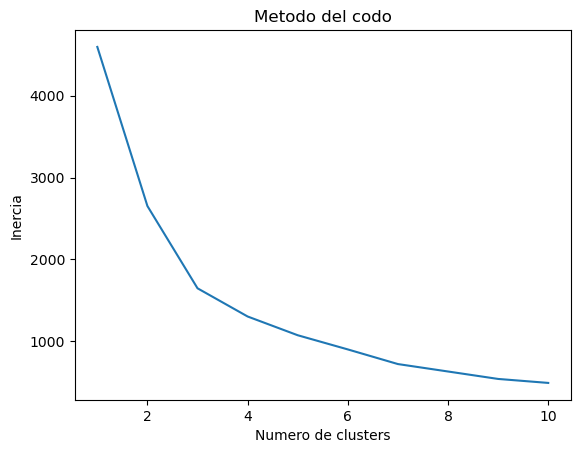

In [4]:
# Genero distintos algoritmos para definir el n_cluster que más me convence
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Metodo del codo')
plt.xlabel('Numero de clusters')
plt.ylabel('Inercia')
plt.show()

In [9]:
# Genero el modelo
n_clusters = 4
kmeans = KMeans(n_clusters = n_clusters, 
                init = 'k-means++', 
                max_iter = 300, 
                n_init = 10, 
                random_state = 0)


In [17]:
# Construyo dataframe con predicciones 
df_analizar_pred = pd.DataFrame(df)
df_analizar_pred['Cluster'] = kmeans.fit_predict(X)
df_analizar_pred.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Cluster
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,1


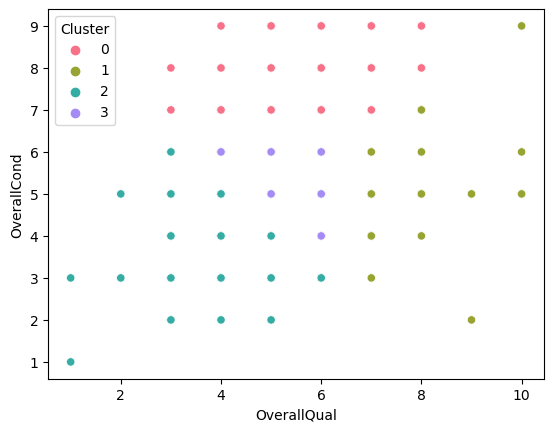

In [18]:
# Grafico
mi_paleta = sns.color_palette("husl", n_colors = n_clusters)
sns.scatterplot(data = df_analizar_pred,
            x = 'OverallQual',
            y = 'OverallCond',
            hue = 'Cluster',
            palette = mi_paleta)
plt.show()

# Y si comparo con el target? 

In [22]:
# Vamos a generarle un nombre 
def asignar_categoria(valor):
    if valor == 0:
        return "Buena"
    elif valor == 1:
        return "Muy Buena"
    elif valor == 2:
        return "Pobre"
    elif valor == 3:
        return "Regular"
    else:
        return "Sin Clasificar"

df['Cluster_Puntaje'] = df['Cluster'].apply(asignar_categoria)



<Axes: xlabel='Cluster_Puntaje', ylabel='SalePrice'>

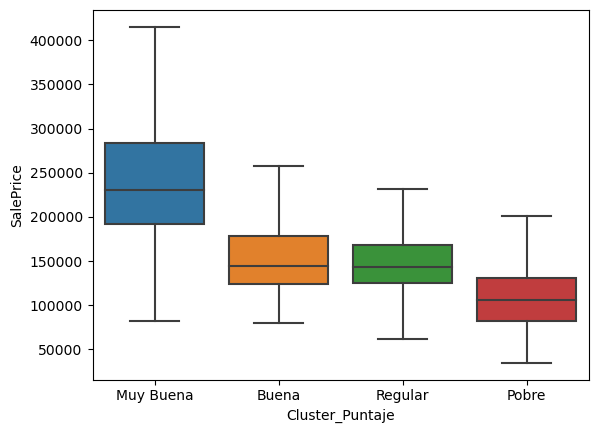

In [23]:
# Boxplot
plt.figure()
sns.boxplot(data = df,
            x = 'Cluster_Puntaje',
            y = 'SalePrice', 
            showfliers = False)